<a href="https://colab.research.google.com/github/hwangsaeyeon/AAI-Web-Development/blob/main/DNN_predict_victory(underfitting).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)

y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5449 entries, 0 to 5448
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A0      5440 non-null   float64
 1   A1      5448 non-null   float64
 2   A2      5449 non-null   float64
 3   A3      5449 non-null   float64
 4   A4      5420 non-null   float64
 5   A5      5443 non-null   float64
 6   A6      5448 non-null   float64
 7   A7      5442 non-null   float64
 8   A8      5444 non-null   float64
 9   A9      5432 non-null   float64
 10  H0      5445 non-null   float64
 11  H1      5445 non-null   float64
 12  H2      5449 non-null   float64
 13  H3      5447 non-null   float64
 14  H4      5430 non-null   float64
 15  H5      5447 non-null   float64
 16  H6      5446 non-null   float64
 17  H7      5445 non-null   float64
 18  H8      5443 non-null   float64
 19  H9      5438 non-null   float64
dtypes: float64(20)
memory usage: 851.5 KB


In [7]:
np.unique(y,return_counts=True)

(array([0, 1]), array([2942, 2507]))

In [9]:
import math
x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)
# xData nan 값을 해당하는 열의 평균값으로 변경하기
xData_column = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9','H0','H1','H2','H3','H4','H5','H6','H7','H8','H9']
def avg(col):
  nanCheck = 0
  for i in range(len(x)):
      for column in xData_column:
          if math.isnan(x[column][i]):
              x[column][i] = round(x[column].mean(), 2)
              nanCheck += 1
  print('%d 개의 nan 값을 각 열의 평균값으로 변경 완료했습니다.' %nanCheck)
  return x

In [ ]:
import pandas as pd
import numpy as np
x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)
y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)
y = np.array(y)

x = avg(xData_column)
x_away = np.array(x.iloc[:,0:10])
x_home = np.array(x.iloc[:,10:])
X = pd.concat([pd.DataFrame(x_away),pd.DataFrame(x_home)])
X = pd.DataFrame(np.array(X))

inverse_y = np.zeros(len(y))
inverse_y = np.array(inverse_y).reshape(-1,1)

for i in range(len(y)):
  inverse_y[i] = 1 - y[i]
y = pd.DataFrame(y)
inverse_y = pd.DataFrame(inverse_y)
y = pd.concat([y,inverse_y])
y = pd.DataFrame(np.array(y))



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = input_shape),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30,activation='relu'),
    tf.keras.layers.Dense(24,activation='relu'),
    tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(X_train, y_train, epochs=30,validation_split=0.2,batch_size=5)


130 개의 nan 값을 각 열의 평균값으로 변경 완료했습니다.
(8718, 10) (2180, 10)
(8718, 1) (2180, 1)
Epoch 1/30
1395/1395 [==============================] - 5s 3ms/step - loss: 0.6954 - binary_accuracy: 0.4964 - val_loss: 0.6934 - val_binary_accuracy: 0.5103
Epoch 2/30
1395/1395 [==============================] - 5s 3ms/step - loss: 0.6931 - binary_accuracy: 0.5194 - val_loss: 0.6931 - val_binary_accuracy: 0.5138
Epoch 3/30
1395/1395 [==============================] - 4s 3ms/step - loss: 0.6923 - binary_accuracy: 0.5231 - val_loss: 0.6926 - val_binary_accuracy: 0.5206
Epoch 4/30
1395/1395 [==============================] - 5s 3ms/step - loss: 0.6916 - binary_accuracy: 0.5254 - val_loss: 0.6923 - val_binary_accuracy: 0.5235
Epoch 5/30
1395/1395 [==============================] - 4s 3ms/step - loss: 0.6917 - binary_accuracy: 0.5247 - val_loss: 0.6928 - val_binary_accuracy: 0.5149
Epoch 6/30
1395/1395 [==============================] - 5s 3ms/step - loss: 0.6914 - binary_accuracy: 0.5252 - val_loss: 0.6918 - va

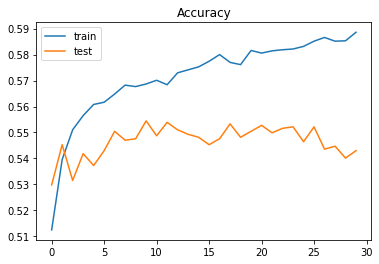

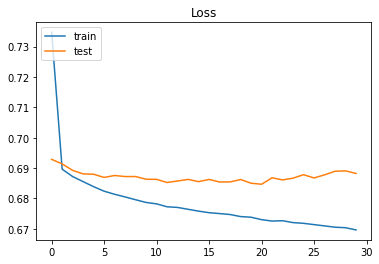

In [17]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [41]:
import pandas as pd
import numpy as np
x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)
y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)
y = np.array(y)

x = avg(xData_column)

X = np.array(x.iloc[:,0:10]) - np.array(x.iloc[:,10:])
for i in range(len(X)):
  for j in range(len(X[0])):
    if X[i][j] < 0 :
      X[i][j] = 0 
    elif X[i][j] > 0:
      X[i][j] = 1
    else:
      X[i][j] = 0.5

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)



import tensorflow as tf
input_shape = [X_train.shape[1]]
model = tf.keras.models.Sequential([
    #tf.keras.layers.Flatten(input_shape = input_shape),
    #tf.keras.layers.BatchNormalization(),
    
    #tf.keras.layers.Dense(12,activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['binary_accuracy'])
hist = model.fit(X_train, y_train, epochs=200 ,validation_split=0.2,batch_size=5)




130 개의 nan 값을 각 열의 평균값으로 변경 완료했습니다.
(4359, 10) (1090, 10)
(4359, 1) (1090, 1)
Epoch 1/200
698/698 [==============================] - 2s 2ms/step - loss: 0.6897 - binary_accuracy: 0.5472 - val_loss: 0.6934 - val_binary_accuracy: 0.5206
Epoch 2/200
698/698 [==============================] - 2s 2ms/step - loss: 0.6795 - binary_accuracy: 0.5500 - val_loss: 0.7115 - val_binary_accuracy: 0.5206
Epoch 3/200
698/698 [==============================] - 2s 2ms/step - loss: 0.6713 - binary_accuracy: 0.5856 - val_loss: 0.6850 - val_binary_accuracy: 0.5745
Epoch 4/200
698/698 [==============================] - 2s 2ms/step - loss: 0.6723 - binary_accuracy: 0.5830 - val_loss: 0.6826 - val_binary_accuracy: 0.5688
Epoch 5/200
698/698 [==============================] - 2s 2ms/step - loss: 0.6721 - binary_accuracy: 0.5802 - val_loss: 0.6870 - val_binary_accuracy: 0.5757
Epoch 6/200
698/698 [==============================] - 1s 2ms/step - loss: 0.6711 - binary_accuracy: 0.5787 - val_loss: 0.6928 - val_bina

KeyboardInterrupt: ignored

In [42]:
performance = model.evaluate(X_test, y_test, verbose=1)
print('정답률:',performance[1], 'loss:', performance[0])

35/35 [==============================] - 0s 2ms/step - loss: 0.6853 - binary_accuracy: 0.5679
정답률: 0.567889928817749 loss: 0.685263454914093


In [ ]:
import matplotlib.pyplot as plt 
plt.plot(hist.history['binary_accuracy'])
plt.plot(hist.history['val_binary_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [40]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

import pandas as pd
import numpy as np
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

seed = 0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

x = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_xData.csv")
x = x.drop(['Unnamed: 0'], axis=1)
y = pd.read_csv("/content/drive/MyDrive/2022 인공지능 웹 개발 대회/Data/Data_Processing_yData.csv")
y = y.drop(['Unnamed: 0'], axis=1)
y = np.array(y)

x = x.replace(np.nan,0)

X = np.array(x.iloc[:,0:10]) - np.array(x.iloc[:,10:])
for i in range(len(X)):
  for j in range(len(X[0])):
    if X[i][j] < 0 :
      X[i][j] = 0 
    elif X[i][j] > 0:
      X[i][j] = 1
    else:
      X[i][j] = 0.5

n_fold = 5
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state =seed)
accuracy = []

for train, test in skf.split(X, y):
  model = Sequential()
  model.add(Dense(12, activation = 'relu'))
  model.add(Dense(12, activation = 'relu'))
  model.add(Dense(8, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), metrics = ['binary_accuracy'])


  hist = model.fit(X[train], y[train], epochs = 100, batch_size=5)
  k_accuracy = "%.4f" %(model.evaluate(X[train], y[train])[1])
  accuracy.append(k_accuracy)

print("\n %.f fold accuracy : "%(n_fold), accuracy)

Train on 4359 samples
Epoch 1/100
4359/4359 [==============================] - 3s 679us/sample - loss: 0.7034 - binary_accuracy: 0.5042
Epoch 2/100
4359/4359 [==============================] - 1s 323us/sample - loss: 0.6983 - binary_accuracy: 0.5102
Epoch 3/100
4359/4359 [==============================] - 1s 305us/sample - loss: 0.6953 - binary_accuracy: 0.5118
Epoch 4/100
4359/4359 [==============================] - 1s 307us/sample - loss: 0.6930 - binary_accuracy: 0.5198
Epoch 5/100
4359/4359 [==============================] - 1s 324us/sample - loss: 0.6909 - binary_accuracy: 0.5276
Epoch 6/100
4359/4359 [==============================] - 1s 321us/sample - loss: 0.6891 - binary_accuracy: 0.5331
Epoch 7/100
4359/4359 [==============================] - 1s 304us/sample - loss: 0.6874 - binary_accuracy: 0.5435
Epoch 8/100
4359/4359 [==============================] - 1s 306us/sample - loss: 0.6859 - binary_accuracy: 0.5490
Epoch 9/100
4359/4359 [==============================] - 1s 319us/

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train on 4359 samples
Epoch 1/100
4359/4359 [==============================] - 2s 370us/sample - loss: 0.6941 - binary_accuracy: 0.4983
Epoch 2/100
4359/4359 [==============================] - 2s 387us/sample - loss: 0.6920 - binary_accuracy: 0.5210
Epoch 3/100
4359/4359 [==============================] - 2s 363us/sample - loss: 0.6903 - binary_accuracy: 0.5380
Epoch 4/100
4359/4359 [==============================] - 2s 348us/sample - loss: 0.6889 - binary_accuracy: 0.5499
Epoch 5/100
4359/4359 [==============================] - 1s 327us/sample - loss: 0.6874 - binary_accuracy: 0.5582
Epoch 6/100
4359/4359 [==============================] - 1s 294us/sample - loss: 0.6861 - binary_accuracy: 0.5680
Epoch 7/100
4359/4359 [==============================] - 1s 327us/sample - loss: 0.6849 - binary_accuracy: 0.5669
Epoch 8/100
4359/4359 [==============================] - 2s 350us/sample - loss: 0.6836 - binary_accuracy: 0.5724
Epoch 9/100
4359/4359 [==============================] - 2s 395us/

In [41]:
performance = model.evaluate(X_test, y_test, verbose=1)
print('정답률:',performance[1], 'loss:', performance[0])

정답률: 0.6238532 loss: 0.6527562088922623
